In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, sem
from utility import *

### 7.L
This exercise is to reinforce numerically what Exercise 7.4 has demonstrated.
Consider a very simple problem of estimating
$$
    \mathbb{P}(Z \in A)
$$
where $Z$ is a standard normal random variable and $A = (-\infty, a] \cup [b, \infty)$ is
a nonconvex set. Compare the following algorithms:

i. The plain Monte Carlo.

ii. Importance Sampling using the mode matching method.

iii. Importance sampling using the iterative cross entropy method with the initial
tilting parameter $\hat{\theta}^0 = a$.

iv. Importance sampling using the iterative cross entropy method with the initial
tilting parameter $\hat{\theta}^0 = b$.

Perform ten sets of simulations for each scheme given $a = −2.2$ and $b = 2$,
with sample size $n = 10000$, pilot sample size $N = 2000$, and the number
of iterations $\text{IT\_NUM} = 5$. Report your estimates, standard 
errors, and 95% confidence intervals. Describe your findings.
From the simulation, you will see clearly that the standard error of an
importance sampling estimate is not always trustworthy when the problem involves nonconvex sets, or more generally, nonconvex functions.
Therefore, when one wishes to use importance sampling to estimate the price of an option with nonconvex payoff (e.g., an outperformance option), exercise caution because selecting an alternative sampling density from the exponential family may lead to erroneous
estimates.

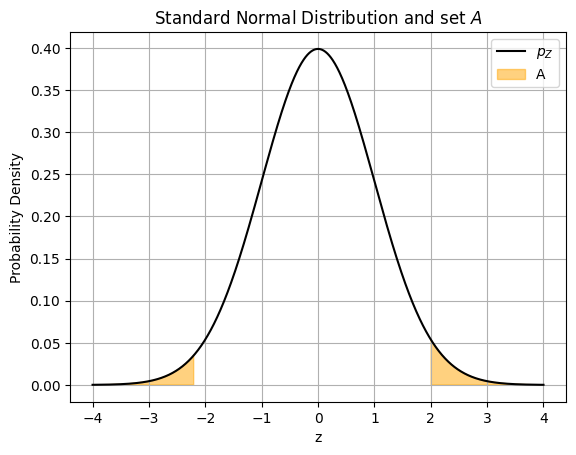

In [ ]:
a, b = -2.2, 2.0

# plot the standard normal distribution and highlight the region were z in set A
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')

plt.title('Standard Normal Distribution and set $A$')
plt.xlabel('z')
plt.ylabel('Probability Density')

# legend in top right corner
plt.legend(loc='upper right')
plt.grid()

plt.show()

In [27]:
# Theoretical value
p_A = norm.cdf(a) + (1 - norm.cdf(b))

Theoretical p_A: 0.0367
Plain MC estimate: 0.0385, SE: 0.0019, RE: 0.0500
95% CI: [0.0347, 0.0423]


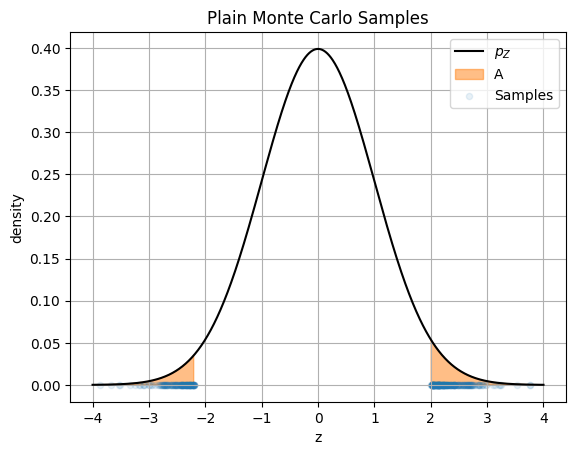

In [29]:
n = 10_000
N = 2_000
it_num = 5

# Plain Monte Carlo
Z = np.random.randn(n)
plain_H = (Z <= a) | (Z >= b)

plain_est = np.mean(plain_H)
plain_se = sem(plain_H)
plain_re = plain_se / plain_est

plain_conf = (plain_est - 1.96 * plain_se, plain_est + 1.96 * plain_se)

print(f'Theoretical p_A: {p_A:.4f}')
print(f'Plain MC estimate: {plain_est:.4f}, SE: {plain_se:.4f}, RE: {plain_re:.4f}')
print(f'95% CI: [{plain_conf[0]:.4f}, {plain_conf[1]:.4f}]')

# plot samples for plain MC on top of the standard normal distribution
plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')
plt.scatter(Z[plain_H], np.zeros_like(Z[plain_H]), color='tab:blue', alpha=0.1, label='Samples', s=20)

plt.title('Plain Monte Carlo Samples')
plt.xlabel('z')
plt.ylabel('density')
plt.legend(loc='upper right')
plt.grid()

plt.show()

Theoretical p_A: 0.0367
IS (mode matching) estimate: 0.0231, SE: 0.0004, RE: 0.0152
95% CI: [0.0224, 0.0238]


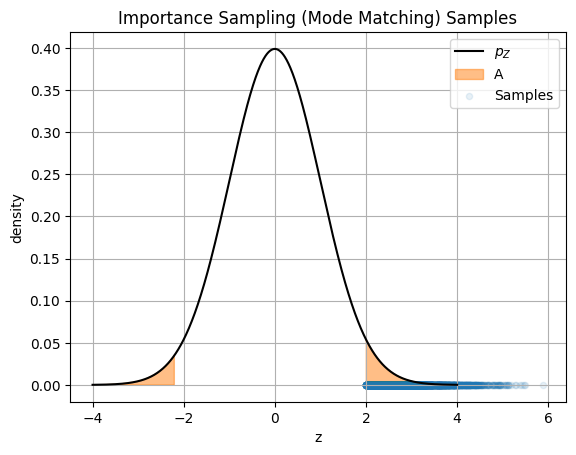

In [ ]:
# Importance sampling with mode matching
mode = b

Z_is_mm = np.random.randn(n) + mode
is_mm_H = (Z_is_mm <= a) | (Z_is_mm >= b)
tilt = np.exp(0.5 * mode**2 - mode * Z_is_mm)

is_mm_est = np.mean(is_mm_H * tilt)
is_mm_se = sem(is_mm_H * tilt)
is_mm_re = is_mm_se / is_mm_est

is_mm_conf = (is_mm_est - 1.96 * is_mm_se, is_mm_est + 1.96 * is_mm_se)

print(f'Theoretical p_A: {p_A:.4f}')
print(f'IS (mode matching) estimate: {is_mm_est:.4f}, SE: {is_mm_se:.4f}, RE: {is_mm_re:.4f}')
print(f'95% CI: [{is_mm_conf[0]:.4f}, {is_mm_conf[1]:.4f}]')

# plot samples for IS (mode matching) on top of the standard normal distribution
plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')
plt.scatter(Z_is_mm[is_mm_H], np.zeros_like(Z_is_mm[is_mm_H]), color='tab:blue', alpha=0.1, label='Samples', s=20)

plt.title('Importance Sampling (Mode Matching) Samples')
plt.xlabel('z')
plt.ylabel('density')

plt.legend(loc='upper right')
plt.grid()

plt.show()

Theoretical p_A: 0.0367
IS (cross-entropy) estimate: 0.0138, SE: 0.0002, RE: 0.0159
95% CI: [0.0134, 0.0143]


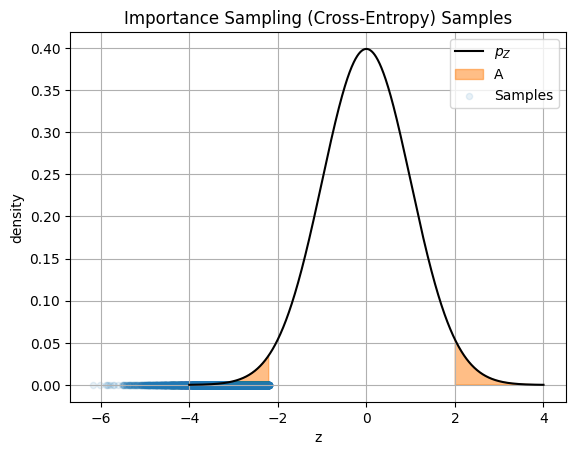

In [30]:
# Importance sampling with iterative cross-entropy with initial tilting parameter a
theta = a
for i in range(it_num):
    Z_is_ce_a = np.random.randn(n) + theta
    is_ce_H = (Z_is_ce_a <= a) | (Z_is_ce_a >= b)
    
    exp_theta_Z = np.exp(- theta * Z_is_ce_a)

    # Update theta
    theta = np.sum(is_ce_H * exp_theta_Z * Z_is_ce_a) / np.sum(is_ce_H * exp_theta_Z)


Z_is_ce = np.random.randn(n) + theta
is_ce_H = (Z_is_ce <= a) | (Z_is_ce >= b)
tilt = np.exp(0.5 * theta**2 - theta * Z_is_ce)

is_ce_est = np.mean(is_ce_H * tilt)
is_ce_se = sem(is_ce_H * tilt)
is_ce_re = is_ce_se / is_ce_est

is_ce_conf = (is_ce_est - 1.96 * is_ce_se, is_ce_est + 1.96 * is_ce_se)

print(f'Theoretical p_A: {p_A:.4f}')
print(f'IS (cross-entropy) estimate: {is_ce_est:.4f}, SE: {is_ce_se:.4f}, RE: {is_ce_re:.4f}')
print(f'95% CI: [{is_ce_conf[0]:.4f}, {is_ce_conf[1]:.4f}]')

# plot samples for IS (cross-entropy) on top of the standard normal distribution
plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')
plt.scatter(Z_is_ce[is_ce_H], np.zeros_like(Z_is_ce[is_ce_H]), color='tab:blue', alpha=0.1, label='Samples', s=20)

plt.title('Importance Sampling (Cross-Entropy) Samples')
plt.xlabel('z')
plt.ylabel('density')

plt.legend(loc='upper right')
plt.grid()

plt.show()

Theoretical p_A: 0.0367
IS (cross-entropy) estimate: 0.0221, SE: 0.0003, RE: 0.0154
95% CI: [0.0214, 0.0227]


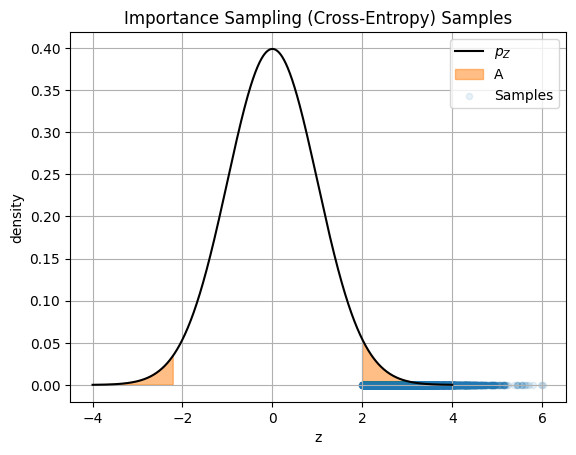

In [31]:
# Importance sampling with iterative cross-entropy with initial tilting parameter b
theta = b
for i in range(it_num):
    Z_is_ce_b = np.random.randn(n) + theta
    is_ce_H = (Z_is_ce_b <= a) | (Z_is_ce_b >= b)
    
    exp_theta_Z = np.exp(- theta * Z_is_ce_b)

    # Update theta
    theta = np.sum(is_ce_H * exp_theta_Z * Z_is_ce_b) / np.sum(is_ce_H * exp_theta_Z)


Z_is_ce = np.random.randn(n) + theta
is_ce_H = (Z_is_ce <= a) | (Z_is_ce >= b)
tilt = np.exp(0.5 * theta**2 - theta * Z_is_ce)

is_ce_est = np.mean(is_ce_H * tilt)
is_ce_se = sem(is_ce_H * tilt)
is_ce_re = is_ce_se / is_ce_est

is_ce_conf = (is_ce_est - 1.96 * is_ce_se, is_ce_est + 1.96 * is_ce_se)

print(f'Theoretical p_A: {p_A:.4f}')
print(f'IS (cross-entropy) estimate: {is_ce_est:.4f}, SE: {is_ce_se:.4f}, RE: {is_ce_re:.4f}')
print(f'95% CI: [{is_ce_conf[0]:.4f}, {is_ce_conf[1]:.4f}]')

# plot samples for IS (cross-entropy) on top of the standard normal distribution
plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')
plt.scatter(Z_is_ce[is_ce_H], np.zeros_like(Z_is_ce[is_ce_H]), color='tab:blue', alpha=0.1, label='Samples', s=20)

plt.title('Importance Sampling (Cross-Entropy) Samples')
plt.xlabel('z')
plt.ylabel('density')

plt.legend(loc='upper right')
plt.grid()

plt.show()

Instead of choosing the alternative sampling distribution from the exponential family, we consider Gaussian mixtures of the form
$$
    \tilde{\rho}(z; \theta, \beta) = \beta \phi(z - \theta_1) + (1 - \beta) \phi(z - \theta_2)
$$
For $\theta_1 = a$, $\theta_2 = b$, and $\beta = 1/2$ the alternative distribution looks like this.

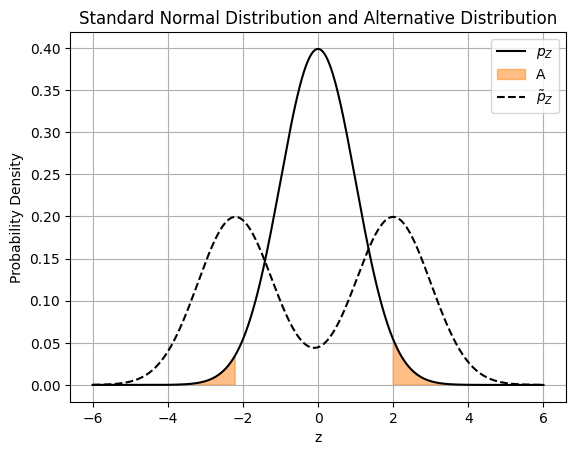

In [43]:
# Plot the alternative distribution on top of the standard normal distribution

x = np.linspace(-6, 6, 1000)
y = norm.pdf(x)

plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')

plt.plot(x, 0.5 * norm.pdf(x - a) + 0.5 * norm.pdf(x - b), label='$\\tilde{p}_Z$', color='black', linestyle='--')

plt.title('Standard Normal Distribution and Alternative Distribution')
plt.xlabel('z')
plt.ylabel('Probability Density')

plt.legend(loc='upper right')
plt.grid()

plt.show()

Using a numerical method to minimize the KL-divergence between
$$ h(x) f(x) = 1\{z \in A \} p_Z(z), \quad \tilde{p}(z; \theta, \beta), $$
we can find the optimal parameters $\theta_1, \theta_2$ and $\beta$. Then we use this alternative distribution for importance sampling.

This is equivalent to maximizing the following objective function
$$
   \int_{\mathbb{R}} h(x) f(x) \log \tilde{p}(x; \theta, \beta) dx = E[h(Z) \log \tilde{p}(Z; \theta, \beta)]
$$

whose maximizers can be obtained via the EM algorithm.

In [ ]:
def gaussian_mixture_pdf(x, theta1, theta2, beta):
    return beta * norm.pdf(x, loc=theta1) + (1 - beta) * norm.pdf(x, loc=theta2)

initial_params = [a, b, 0.5]

def em_optimization(initial_params, it_num=it_num, N=N):
    theta1_opt, theta2_opt, beta_opt = initial_params

    theta1_history = [theta1_opt]
    theta2_history = [theta2_opt]

    # Optimize log likelihood weighted by importance weights using the EM algorithm
    for _ in range(it_num):
        Z_is = np.random.randn(N)
        H = (Z_is <= a) | (Z_is >= b)
        weights = H * (norm.pdf(Z_is) / gaussian_mixture_pdf(Z_is, theta1_opt, theta2_opt, beta_opt))
        
        # E-step: compute responsibilities
        resp1 = beta_opt * norm.pdf(Z_is, loc=theta1_opt)
        resp2 = (1 - beta_opt) * norm.pdf(Z_is, loc=theta2_opt)
        sum_resp = resp1 + resp2
        r1 = resp1 / sum_resp
        r2 = resp2 / sum_resp
        
        # M-step: update parameters
        theta1_opt = np.sum(weights * r1 * Z_is) / np.sum(weights * r1)
        theta2_opt = np.sum(weights * r2 * Z_is) / np.sum(weights * r2)
        beta_opt = np.sum(weights * r1) / np.sum(weights)

        theta1_opt, theta2_opt = min(theta1_opt, theta2_opt), max(theta1_opt, theta2_opt)

        theta1_history.append(theta1_opt)
        theta2_history.append(theta2_opt)

    return theta1_opt, theta2_opt, beta_opt, theta1_history, theta2_history

theta1_opt, theta2_opt, beta_opt, _, _ = em_optimization(initial_params)

print(f'Optimal parameters: theta1 = {theta1_opt:.4f}, theta2 = {theta2_opt:.4f}, beta = {beta_opt:.4f}')

# Importance sampling with Gaussian mixture
Z_is_gm = np.random.randn(n)

# Sample from the Gaussian mixture
u = np.random.rand(n)
Z_is_gm = np.where(u < beta_opt, Z_is_gm + theta1_opt, Z_is_gm + theta2_opt)
is_gm_H = (Z_is_gm <= a) | (Z_is_gm >= b)
tilt = norm.pdf(Z_is_gm) / gaussian_mixture_pdf(Z_is_gm, theta1_opt, theta2_opt, beta_opt)


is_gm_est = np.mean(is_gm_H * tilt)
is_gm_se = sem(is_gm_H * tilt)
is_gm_re = is_gm_se / is_gm_est

is_gm_conf = (is_gm_est - 1.96 * is_gm_se, is_gm_est + 1.96 * is_gm_se)

print(f'Theoretical p_A: {p_A:.4f}')
print(f'IS (Gaussian Mixture) estimate: {is_gm_est:.4f}, SE: {is_gm_se:.4f}, RE: {is_gm_re:.4f}')
print(f'95% CI: [{is_gm_conf[0]:.4f}, {is_gm_conf[1]:.4f}]')

Optimal parameters: theta1 = -2.4294, theta2 = 2.2480, beta = 0.2748
Theoretical p_A: 0.0367
IS (Gaussian Mixture) estimate: 0.0368, SE: 0.0006, RE: 0.0160
95% CI: [0.0357, 0.0380]


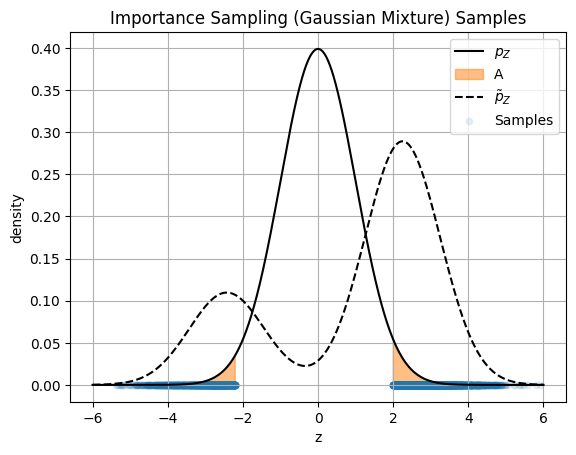

In [159]:
# Plot samples for IS (Gaussian Mixture) on top of the standard normal distribution
plt.plot(x, y, label='$p_Z$', color='black')
plt.fill_between(x, y, where=(x <= a) | (x >= b), color='tab:orange', alpha=0.5, label='A')

plt.plot(x, gaussian_mixture_pdf(x, theta1_opt, theta2_opt, beta_opt), label='$\\tilde{p}_Z$', color='black', linestyle='--')
plt.scatter(Z_is_gm[is_gm_H], np.zeros_like(Z_is_gm[is_gm_H]), color='tab:blue', alpha=0.1, label='Samples', s=20)

plt.title('Importance Sampling (Gaussian Mixture) Samples')
plt.xlabel('z')
plt.ylabel('density')

plt.legend(loc='upper right')
plt.grid()

plt.show()

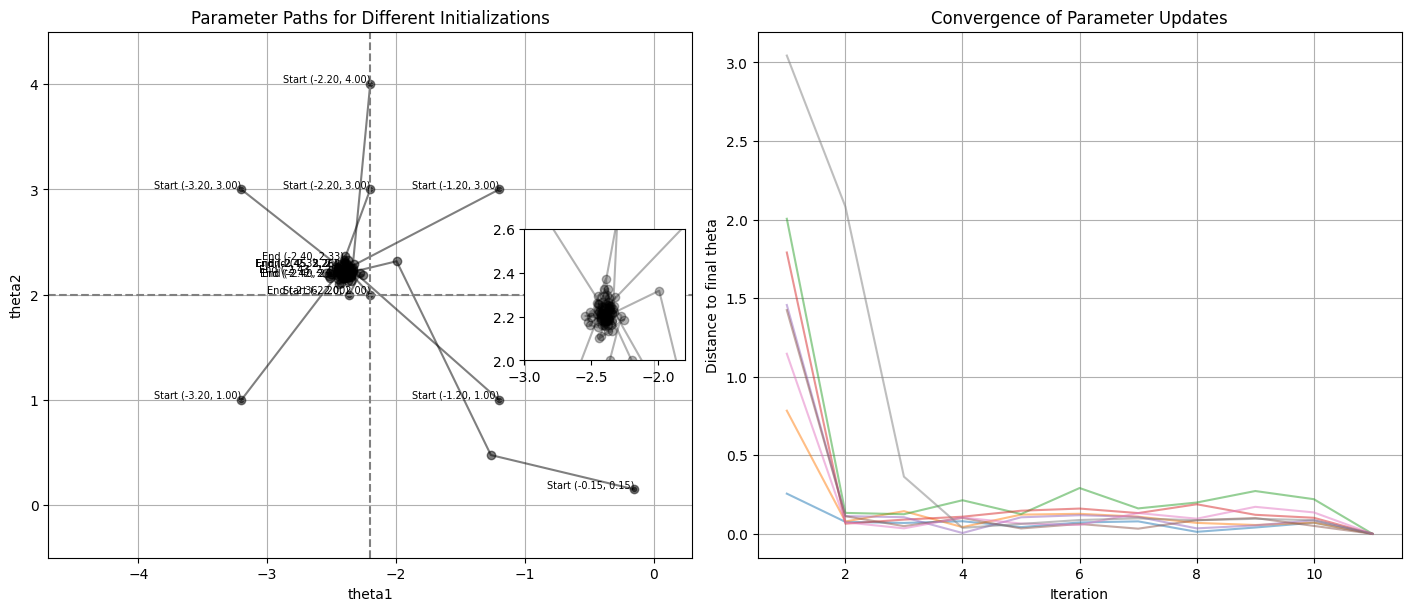

In [169]:
# For different initial parameters,varying in theta1, and theta2, plot the path of the parameters
initial_params_list = [
    [a, b, 0.5],
    [a, b + 1, 0.5],
    [a, b + 2, 0.5],
    [a + 1, b - 1, 0.5],
    [a + 1, b + 1, 0.5],
    [a - 1, b - 1, 0.5],
    [a - 1, b + 1, 0.5],
    [-0.15 , 0.15, 0.5]
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
ax_path = axes[0]  # left subplot for parameter paths
ax_conv = axes[1]  # right subplot for convergence

# plot 2 subplots, left one is for the parameter paths and the right is for the convergence
#...

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

axins = inset_axes(ax_path, width="25%", height="25%", loc='center right')

for initial_params in initial_params_list:
    # parameter path plot
    _, _, _, theta1_history, theta2_history = em_optimization(initial_params, it_num=10, N=1000)
    ax_path.plot(theta1_history, theta2_history, marker='o', alpha=0.5, color='black')
    ax_path.scatter(theta1_history[0], theta2_history[0], label='Start' if initial_params == initial_params_list[0] else "", s=10, alpha=0.5, color='black')
    ax_path.scatter(theta1_history[-1], theta2_history[-1], label='End' if initial_params == initial_params_list[0] else "", s=10, alpha=0.5, color='black')
    ax_path.text(theta1_history[0], theta2_history[0], f'Start ({theta1_history[0]:.2f}, {theta2_history[0]:.2f})', fontsize=7, verticalalignment='bottom', horizontalalignment='right')
    ax_path.text(theta1_history[-1], theta2_history[-1], f'End ({theta1_history[-1]:.2f}, {theta2_history[-1]:.2f})', fontsize=7, verticalalignment='bottom', horizontalalignment='right')

    # inset plot
    axins.plot(theta1_history, theta2_history, marker='o', alpha=0.3, color='black')

    # convergence plot
    theta1_final, theta2_final = theta1_history[-1], theta2_history[-1]
    dist = [((t1 - theta1_final)**2 + (t2 - theta2_final)**2)**0.5
            for t1, t2 in zip(theta1_history, theta2_history)]
    ax_conv.plot(range(1, len(dist)+1), dist, alpha=0.5)

# parameter path plot settings
ax_path.axvline(x=a, color='gray', linestyle='--', label='a')
ax_path.axhline(y=b, color='gray', linestyle='--', label='b')

ax_path.set_title('Parameter Paths for Different Initializations')
ax_path.set_xlabel('theta1')
ax_path.set_ylabel('theta2')

ax_path.set_xlim(a - 2.5, a + 2.5)
ax_path.set_ylim(b - 2.5, b + 2.5)


ax_path.grid(True)

# inset plot settings    
axins.set_xlim(-3, -1.8)
axins.set_ylim(2.0, 2.6)

# convergence plot settings
ax_conv.set_title('Convergence of Parameter Updates')
ax_conv.set_xlabel('Iteration')
ax_conv.set_ylabel('Distance to final theta')
ax_conv.grid(True)

plt.show()